# Análise Estatística de Dados e Informações
**PPCA/UNB**

---

**Prova - Questão 04**  
**Professor**: João Gabriel de Moraes Sousa  
**Aluna**: Andreia Queiroz Correia Dummar  
**Matrícula**: 241134680  
**Data da Entrega**: 09/02/2025  
**Github**: https://github.com/aqcorreia/AEDI/tree/main/Prova

---

**Aplicação**: Modelo Preditivo

**Dados**: Risco de Crédito (https://www.kaggle.com/datasets/ppb00x/credit-risk-customers)

---

O dataset `credit_customers` contém informações sobre clientes de crédito, possivelmente de um banco ou instituição financeira, e seus respectivos detalhes financeiros e pessoais. 

Contém as seguintes colunas:

| **Coluna**                | **Descrição** |
|---------------------------|--------------|
| `checking_status`         | Status da conta corrente do cliente. |
| `duration`               | Duração do empréstimo em meses. |
| `credit_history`         | Histórico de crédito do cliente, incluindo registros de pagamentos anteriores. |
| `purpose`               | Finalidade do crédito (ex.: carro, educação, móveis, etc.). |
| `credit_amount`         | Valor total do crédito solicitado. |
| `savings_status`       | Status da conta poupança do cliente. |
| `employment`           | Tempo de emprego do cliente na empresa atual. |
| `installment_commitment` | Percentual da renda comprometido com a parcela do crédito. |
| `personal_status`      | Estado civil e gênero do cliente. |
| `other_parties`        | Indica se há outras partes envolvidas no crédito (ex.: co-mutários). |
| `residence_since`      | Tempo de residência no endereço atual. |
| `property_magnitude`   | Tipo de propriedade que o cliente possui (ex.: carro, casa, outros). |
| `age`                 | Idade do cliente em anos. |
| `other_payment_plans` | Indica se o cliente possui outros planos de pagamento além do crédito atual. |
| `housing`             | Tipo de moradia do cliente (própria, alugada, etc.). |
| `existing_credits`    | Número de créditos existentes do cliente. |
| `job`                 | Tipo de emprego ou ocupação do cliente. |
| `num_dependents`      | Número de dependentes financeiros do cliente. |
| `own_telephone`       | Indica se o cliente possui telefone próprio. |
| `foreign_worker`      | Indica se o cliente é trabalhador estrangeiro. |
| `class`              | Classificação do risco de crédito (ex.: bom ou ruim). |

---

---

## **Discussão do Problema**

O risco de crédito é a **probabilidade de um tomador de empréstimo não cumprir suas obrigações financeiras**, afetando diretamente a rentabilidade dos bancos e a estabilidade econômica. Esse risco pode ser causado por diversos fatores, como crises econômicas, perda de emprego, variações na taxa de juros e até mesmo falhas na análise de crédito das instituições financeiras.

**Impacto no Setor Bancário**  
- **Lucratividade e Segurança Financeira**: O risco de crédito afeta diretamente o balanço financeiro das instituições bancárias. Altas taxas de inadimplência podem reduzir os lucros e aumentar a necessidade de provisões para perdas.
- **Precificação de Empréstimos**: Modelos de risco são utilizados para **ajustar taxas de juros** com base no perfil do tomador, garantindo que o banco compense o risco assumido.
- **Concessão de Crédito**: Bancos utilizam modelos estatísticos e algoritmos de Machine Learning para prever a probabilidade de inadimplência, permitindo uma tomada de decisão mais assertiva sobre a liberação de crédito.

**Impacto na Economia**  
- **Disponibilidade de Crédito**: Quando o risco de crédito é alto, as instituições financeiras podem **restringir a concessão de empréstimos**, dificultando o acesso a crédito para consumidores e empresas, o que pode afetar o crescimento econômico.
- **Efeito Sistêmico**: Um aumento no risco de crédito pode gerar uma crise financeira, como ocorreu em 2008, quando a inadimplência em empréstimos subprime desencadeou uma crise global.
- **Regulamentação e Supervisão**: Regulamentos como **Basileia III** impõem requisitos de capital mais rigorosos para os bancos, garantindo que eles tenham reservas suficientes para absorver perdas e evitar crises bancárias.

**Conclusão**
O gerenciamento eficiente do risco de crédito é essencial para **a estabilidade do sistema financeiro**, garantindo um fluxo de crédito seguro e sustentável para a economia. Bancos devem equilibrar a concessão de crédito com estratégias de mitigação de risco, enquanto reguladores devem supervisionar para evitar crises sistêmicas. Dessa forma, é possível promover o crescimento econômico sem comprometer a saúde financeira das instituições.  


---

## 1) Bibliotecas

In [1]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas e Testes de Hipótese
from scipy.stats import chi2_contingency, f_oneway

# Pré-processamento de Dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Balanceamento de Dados
from imblearn.over_sampling import SMOTE

# 🤖 Modelagem e Avaliação
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Explicabilidade de Modelos
import shap


## 2) Funções

In [2]:
def verificar_valores_faltantes(df):
    """
    Função para verificar valores faltantes em um DataFrame.

    Parâmetros:
        df (pd.DataFrame): O DataFrame a ser analisado.

    Retorno:
        pd.DataFrame: DataFrame com as colunas, a quantidade de valores faltantes e o percentual correspondente.
    """
    # Contar valores faltantes por coluna
    valores_faltantes = df.isnull().sum()
    
    # Filtrar apenas colunas com valores faltantes (ignorar valores zero)
    valores_faltantes = valores_faltantes[valores_faltantes > 0]
    
    # Calcular o percentual de valores faltantes
    percentual_faltante = (valores_faltantes / len(df)) * 100
    
    # Criar DataFrame com as informações
    resultado = pd.DataFrame({
        'Coluna': valores_faltantes.index,
        'Valores Faltantes': valores_faltantes.values,
        'Percentual Faltante (%)': percentual_faltante.values
    })
    
    # Ordenar pelo número de valores faltantes
    resultado = resultado.sort_values(by='Valores Faltantes', ascending=False).reset_index(drop=True)
    
    return resultado

In [3]:
def plotar_distribuicao_classe(df, target='class'):
    """
    Gera um gráfico de barras apresentando os possíveis valores da coluna alvo com suas respectivas quantidades
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados.
        target (str): Nome da variável alvo.
    
    Retorno:
        None (exibe o gráfico de distribuição da classe)
    """
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=df[target], hue=df[target], legend=False, palette='coolwarm')
    
    # Adicionar os valores acima das barras com tamanho menor
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
    plt.title(f"Distribuição dos Valores na Coluna '{target}'")
    plt.xlabel(target)
    plt.ylabel("Quantidade")
    plt.xticks(rotation=45)
    plt.show()


In [4]:
def tratar_variavel_alvo(df, target='class'):
    """
    Codifica a variável alvo usando LabelEncoder caso seja categórica.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados.
        target (str): Nome da variável alvo.
    
    Retorno:
        df (pd.DataFrame): DataFrame atualizado com a variável alvo codificada.
        label_mapping (dict): Dicionário de mapeamento das classes originais para numéricas.
    """
    if df[target].dtype == 'object':
        le = LabelEncoder()
        df[target] = le.fit_transform(df[target])
        label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"✔ Variável '{target}' codificada com LabelEncoder: {label_mapping}")
        return df, label_mapping
    else:
        print(f"✔ A variável '{target}' já está no formato numérico.")
        return df, None


In [5]:
def analisar_correlacao(df, target='class'):
    """
    Analisa a correlação das variáveis com a variável alvo (class),
    utilizando Correlação de Pearson para variáveis numéricas,
    ANOVA para variáveis categóricas e Teste Qui-Quadrado para dependência estatística.
    Também gera gráficos para melhor visualização.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo as variáveis preditoras e a variável alvo.
        target (str): Nome da variável alvo para classificação.
    
    Retorno:
        None (exibe métricas e gráficos de correlação)
    """
    # Certificar-se de que a variável alvo está corretamente formatada
    df[target] = df[target].astype(int)

    # Separar variáveis numéricas e categóricas
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Remover a variável alvo das variáveis numéricas
    if target in num_vars:
        num_vars.remove(target)

    # **1. Correlação de Pearson para variáveis numéricas**
    print("\nCorrelação de Pearson para variáveis numéricas:")
    correlacao_numerica = df[num_vars + [target]].corr()[target].drop(target).sort_values(ascending=False)
    print(correlacao_numerica)

    # Visualizar a matriz de correlação
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[num_vars + [target]].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Matriz de Correlação das Variáveis Numéricas com a Classe")
    plt.show()

    # **2. ANOVA para variáveis categóricas**
    print("\nTeste ANOVA para variáveis categóricas:")
    anova_results = {}
    for cat in cat_vars:
        grupos = [df[df[target] == c][cat].dropna() for c in df[target].unique()]
        try:
            stat, p_value = f_oneway(*grupos)
            anova_results[cat] = p_value
        except:
            anova_results[cat] = np.nan

    anova_results = pd.Series(anova_results).dropna().sort_values()
    print(anova_results)

    # **3. Teste Qui-Quadrado para variáveis categóricas**
    print("\nTeste Qui-Quadrado para variáveis categóricas:")
    qui2_results = {}
    for cat in cat_vars:
        tabela_contingencia = pd.crosstab(df[cat], df[target])
        stat, p_value, _, _ = chi2_contingency(tabela_contingencia)
        qui2_results[cat] = p_value

    qui2_results = pd.Series(qui2_results).sort_values()
    print(qui2_results)

    # **4. Visualizar impacto de variáveis categóricas com 3 gráficos por linha**
    num_graficos = len(cat_vars)
    linhas = (num_graficos // 3) + (num_graficos % 3 > 0)

    fig, axes = plt.subplots(linhas, 3, figsize=(15, 5 * linhas))
    axes = axes.flatten()

    for i, cat in enumerate(cat_vars):
        sns.countplot(x=cat, hue=target, data=df, palette='coolwarm', ax=axes[i])
        axes[i].set_title(f"Distribuição da variável {cat} por classe")
        axes[i].tick_params(axis='x', rotation=45)
    
    # Remover eixos vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemplo de uso:
# analisar_correlacao(df, target='class')

In [6]:
def treinar_arvore_decisao(df, target='class', test_size=0.2, max_depth=None, random_state=42):
    """
    Treina um modelo de Árvore de Decisão para classificação de clientes.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados brutos (com variáveis categóricas).
        target (str): Nome da variável alvo.
        test_size (float): Proporção dos dados para o conjunto de teste.
        max_depth (int): Profundidade máxima da árvore (None para sem restrição).
        random_state (int): Semente para reprodução dos resultados.

    Retorno:
        modelo (DecisionTreeClassifier): Modelo treinado.
        X_train, X_test, y_train, y_test: Conjuntos de treino e teste.
    """

    # Certificar que a variável alvo não está em formato de string
    if df[target].dtype == 'object':
        df[target] = df[target].astype('category').cat.codes

    # Separar a variável alvo
    y = df[target]
    X = df.drop(columns=[target])

    # Criar dummies para variáveis categóricas
    X = pd.get_dummies(X, drop_first=True)  # Usa drop_first para evitar multicolinearidade

    # Dividir em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Criar e treinar o modelo de Árvore de Decisão
    modelo = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    modelo.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo.predict(X_test)

    # Avaliação do modelo
    print("\nAcurácia do Modelo:", round(accuracy_score(y_test, y_pred), 4))
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
    print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

    return modelo, X_train, X_test, y_train, y_test

In [7]:
def treinar_modelos_ensemble(df, target='class', test_size=0.2, random_state=42):
    """
    Treina modelos de ensemble (Random Forest e Gradient Boosting) para classificação.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo as variáveis preditoras e a variável alvo.
        target (str): Nome da variável alvo para classificação.
        test_size (float): Proporção dos dados para teste.
        random_state (int): Semente para reprodução dos resultados.

    Retorno:
        dict: Dicionário contendo os modelos treinados e suas métricas.
    """

    # Certificar que a variável alvo não está em formato de string
    if df[target].dtype == 'object':
        df[target] = df[target].astype('category').cat.codes

    # Separar variáveis preditoras e alvo
    y = df[target]
    X = df.drop(columns=[target])

    # Criar dummies para variáveis categóricas
    X = pd.get_dummies(X, drop_first=True)  # Evita multicolinearidade

    # Divisão dos dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Inicializar e treinar modelos de ensemble
    modelos = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_state),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=random_state)
    }

    resultados = {}

    for nome, modelo in modelos.items():
        print(f"\nTreinando {nome}...")
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        # Avaliação do modelo
        acuracia = accuracy_score(y_test, y_pred)
        relatorio = classification_report(y_test, y_pred)
        matriz_confusao = confusion_matrix(y_test, y_pred)

        print(f"Acurácia: {acuracia:.4f}")
        print("Relatório de Classificação:\n", relatorio)
        print("Matriz de Confusão:\n", matriz_confusao)

        resultados[nome] = {
            "modelo": modelo,
            "acuracia": acuracia,
            "relatorio": relatorio,
            "matriz_confusao": matriz_confusao
        }

    return resultados


In [8]:
def treinar_modelos_com_smote(df, target='class', test_size=0.2, random_state=42):
    """
    Treina modelos de aprendizado de máquina (Árvore de Decisão, Random Forest e Gradient Boosting)
    utilizando SMOTE para balanceamento das classes.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados (categóricas ainda NÃO convertidas em dummies).
        target (str): Nome da variável alvo.
        test_size (float): Proporção dos dados para teste.
        random_state (int): Semente para reprodução dos resultados.

    Retorno:
        dict: Dicionário contendo os modelos treinados e suas métricas.
    """

    # **1. Converter variáveis categóricas em dummies**
    df = pd.get_dummies(df, drop_first=True)

    # **2. Garantir que a variável alvo é numérica**
    if df[target].dtype == 'object':
        df[target] = df[target].astype('category').cat.codes

    # **3. Separar variáveis preditoras e alvo**
    X = df.drop(columns=[target])
    y = df[target]

    # **4. Divisão dos dados em treino e teste**
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # **5. Aplicar SMOTE para balanceamento**
    smote = SMOTE(random_state=random_state)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # **6. Modelos a serem treinados**
    modelos = {
        "Árvore de Decisão": DecisionTreeClassifier(max_depth=None, random_state=random_state),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_state),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=random_state)
    }

    resultados = {}

    for nome, modelo in modelos.items():
        print(f"\nTreinando {nome} com SMOTE...")
        modelo.fit(X_train_smote, y_train_smote)
        y_pred = modelo.predict(X_test)

        # **7. Avaliação do modelo**
        acuracia = accuracy_score(y_test, y_pred)
        relatorio = classification_report(y_test, y_pred)
        matriz_confusao = confusion_matrix(y_test, y_pred)

        print(f"Acurácia: {acuracia:.4f}")
        print("Relatório de Classificação:\n", relatorio)
        print("Matriz de Confusão:\n", matriz_confusao)

        resultados[nome] = {
            "modelo": modelo,
            "acuracia": acuracia,
            "relatorio": relatorio,
            "matriz_confusao": matriz_confusao
        }

    return resultados

In [9]:
def explicabilidade_shap(df, target='class', test_size=0.2, random_state=42):
    """
    Aplica o SHAP para explicar as variáveis mais influentes no modelo.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo as variáveis preditoras e a variável alvo.
        target (str): Nome da variável alvo para classificação.
        test_size (float): Proporção dos dados para teste.
        random_state (int): Semente para reprodução dos resultados.

    Retorno:
        modelo (GradientBoostingClassifier): Modelo treinado.
        X_train (pd.DataFrame): Conjunto de treino das variáveis preditoras.
        y_train (pd.Series): Conjunto de treino da variável alvo.
    """

    # Criar dummies para variáveis categóricas
    df = pd.get_dummies(df, drop_first=True)

    # Separar variáveis preditoras e alvo
    X = df.drop(columns=[target])
    y = df[target]

    # Certificar-se de que todas as colunas são numéricas
    X = X.astype(float)

    # Divisão dos dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Treinar modelo escolhido (Gradient Boosting)
    modelo = GradientBoostingClassifier(n_estimators=100, random_state=random_state)
    modelo.fit(X_train, y_train)

    # Criar explicador SHAP para o modelo treinado
    explainer = shap.Explainer(modelo, X_train)
    shap_values = explainer(X_train)

    # Gerar gráfico de importância das features
    shap.summary_plot(shap_values, X_train)

    return modelo, X_train, y_train


## 3) Leitura do arquivo

In [10]:
diretorio = './dados'

credit_customers_data = pd.read_csv(f'{diretorio}/credit_customers.csv', delimiter=',')

credit_customers_data.shape

(1000, 21)

## 4) Análise descritiva

### 4.1) Análise geral

In [11]:
credit_customers_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [12]:
credit_customers_data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [13]:
credit_customers_data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


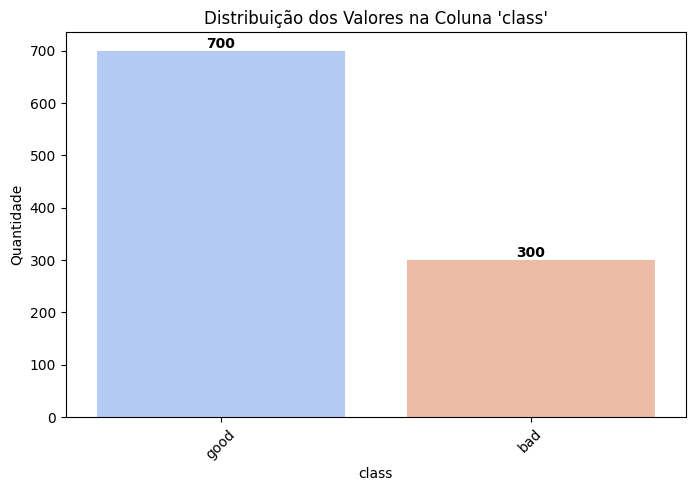

In [14]:
# Analisa a coluna Class

plotar_distribuicao_classe(credit_customers_data, target='class')

### 4.2) Verificar valores faltantes

In [15]:
result = verificar_valores_faltantes(credit_customers_data)

if result.empty:
    print("Não há valores faltantes")
else:
    print(result.head(100))

Não há valores faltantes


### 4.3) Análise da correlação com a variável alvo `class`

In [16]:
# Trata a coluna class, para que exiba na coluna class 1 ao invés de good e 0 no lugar de bad

credit_customers_data01, label_mapping = tratar_variavel_alvo(credit_customers_data, target='class')

credit_customers_data.head()

✔ Variável 'class' codificada com LabelEncoder: {'bad': np.int64(0), 'good': np.int64(1)}


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,1
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,0



Correlação de Pearson para variáveis numéricas:
age                       0.091127
existing_credits          0.045732
num_dependents            0.003015
residence_since          -0.002967
installment_commitment   -0.072404
credit_amount            -0.154739
duration                 -0.214927
Name: class, dtype: float64


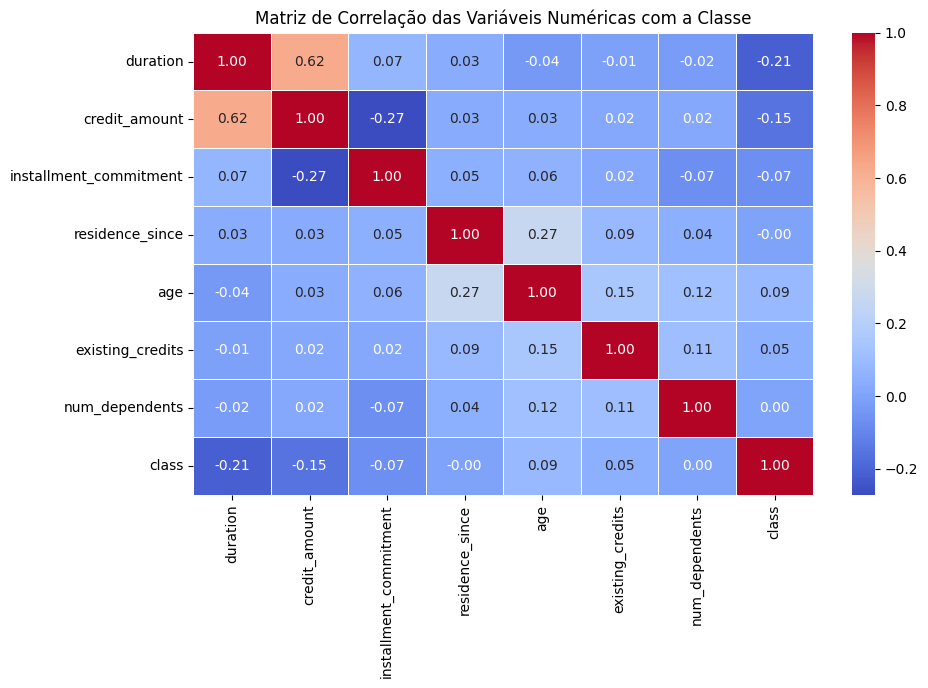


Teste ANOVA para variáveis categóricas:
Series([], dtype: float64)

Teste Qui-Quadrado para variáveis categóricas:
checking_status        1.218902e-26
credit_history         1.279187e-12
savings_status         2.761214e-07
property_magnitude     2.858442e-05
housing                1.116747e-04
purpose                1.157491e-04
employment             1.045452e-03
other_payment_plans    1.629318e-03
foreign_worker         1.583075e-02
personal_status        2.223801e-02
other_parties          3.605595e-02
own_telephone          2.788762e-01
job                    5.965816e-01
dtype: float64


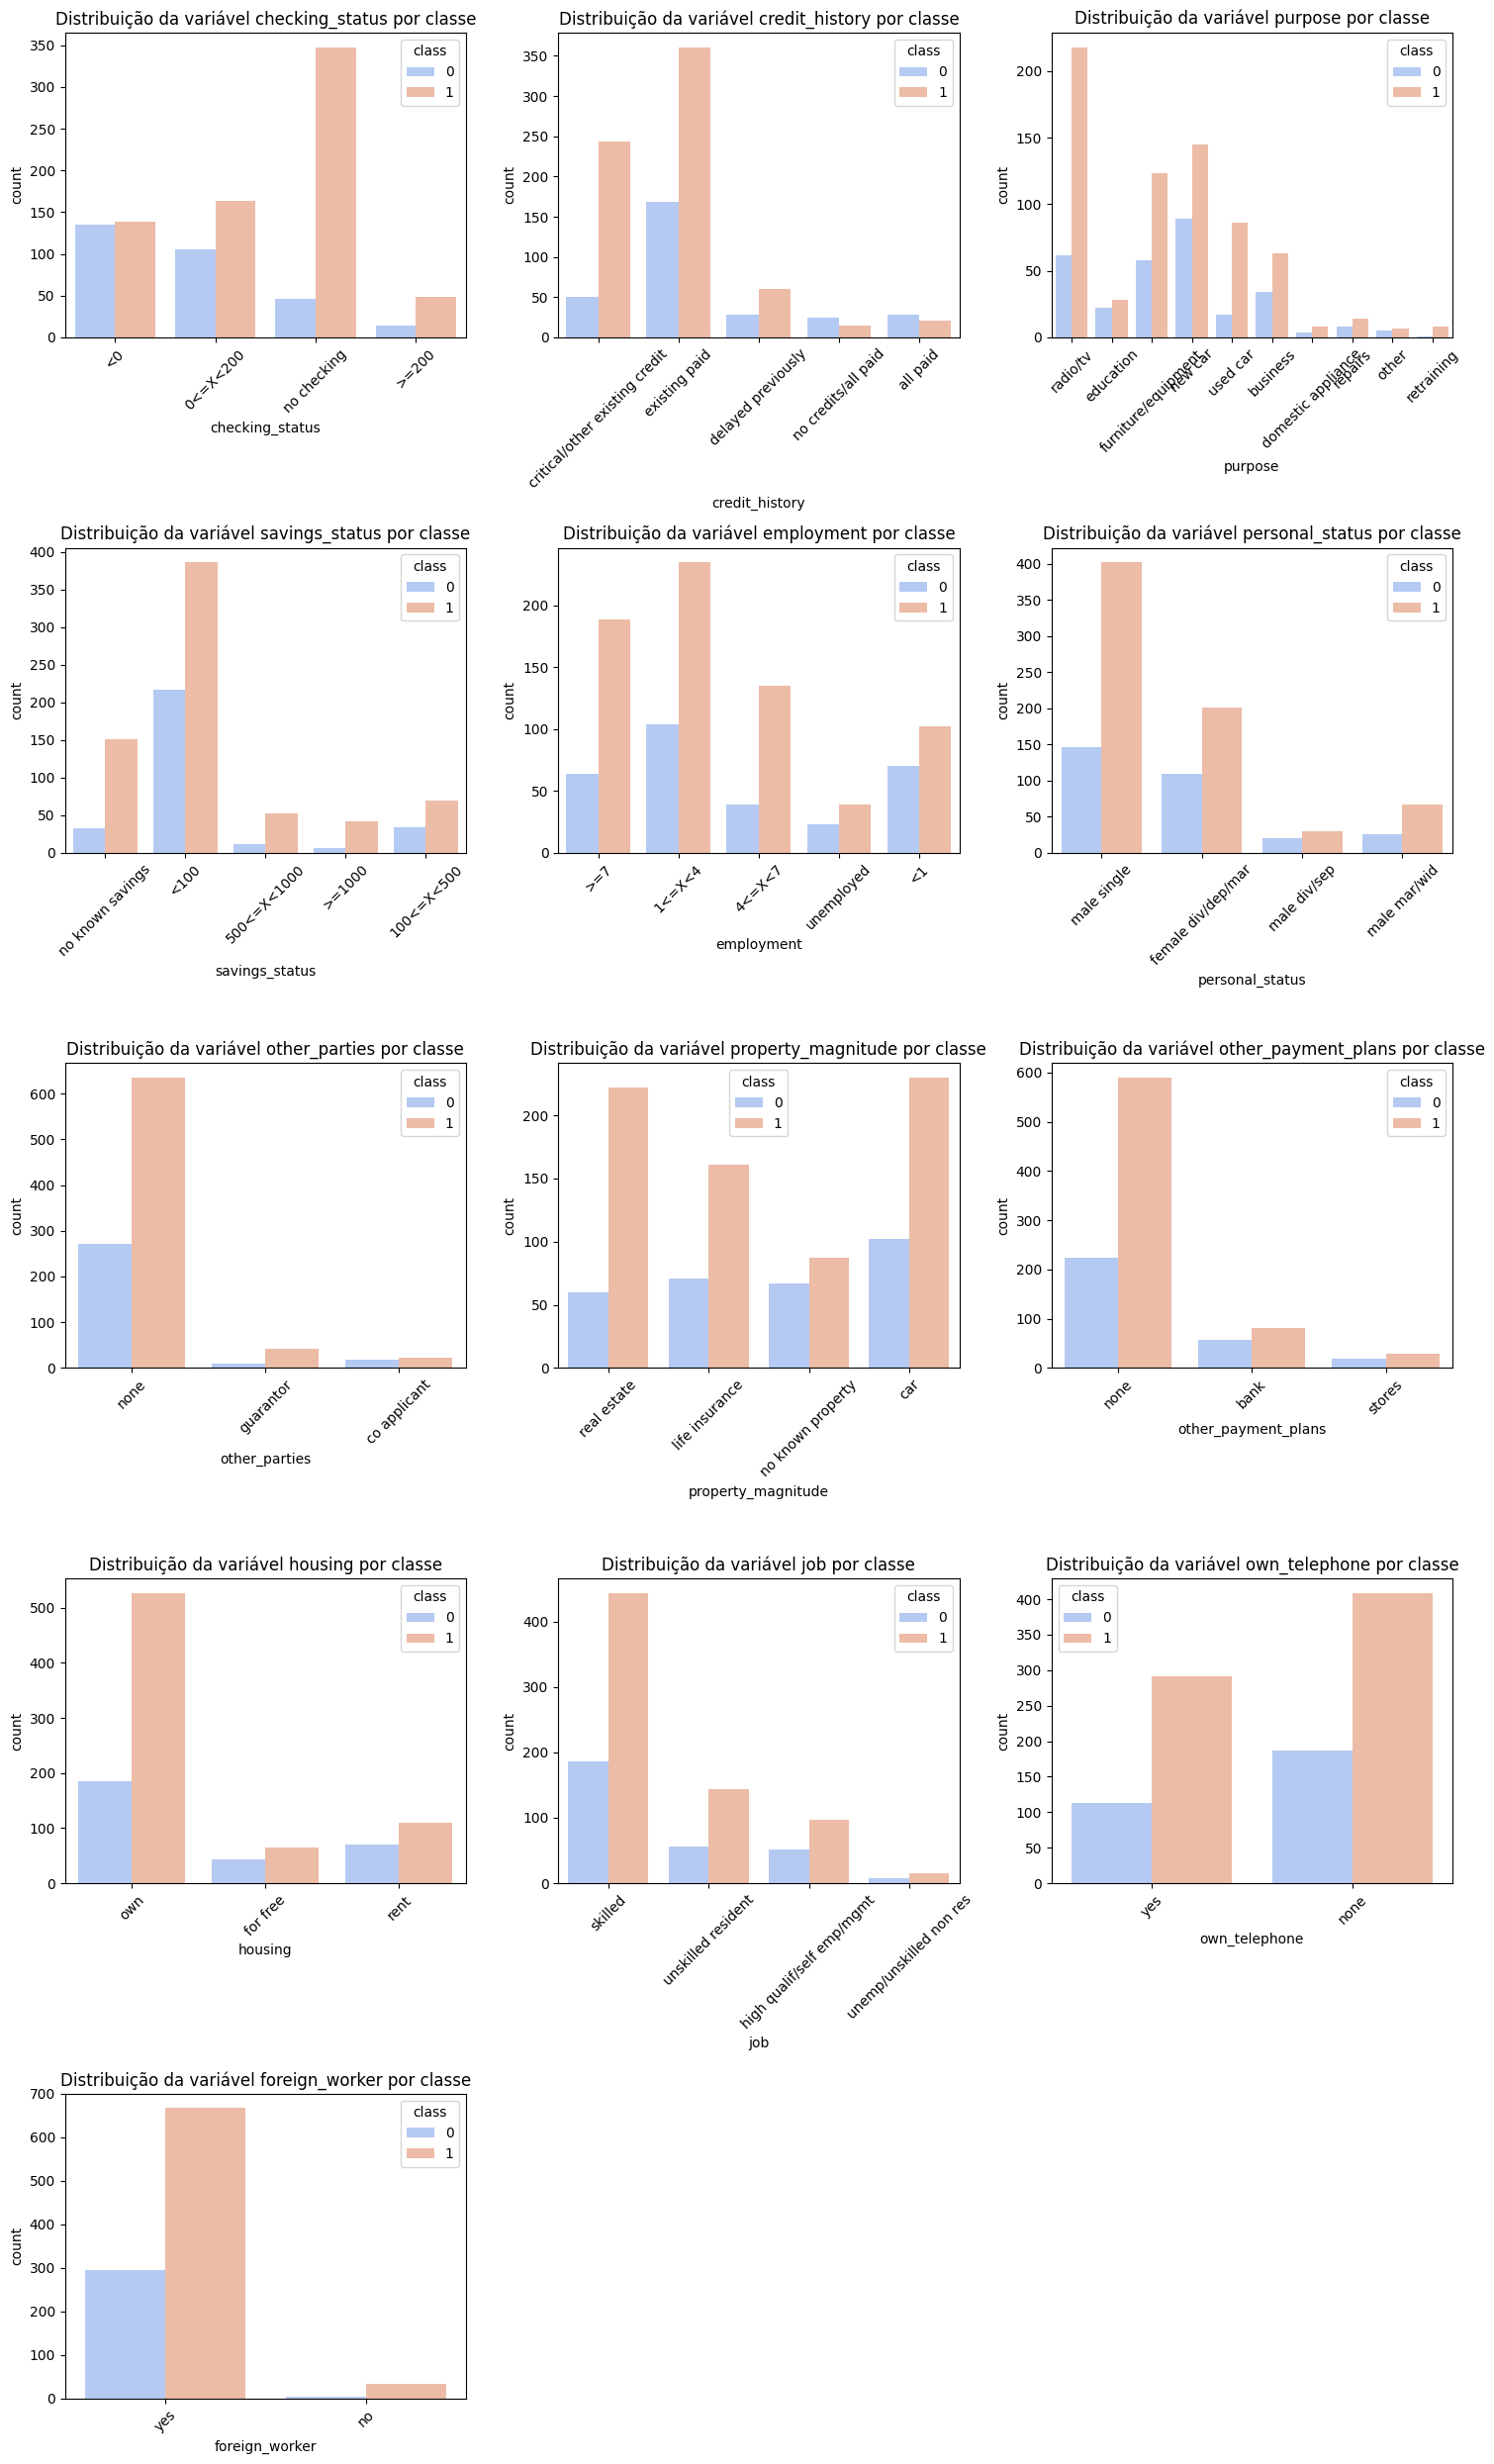

In [17]:
# Análise da correlaçào com a variável alvo `class` 

analisar_correlacao(credit_customers_data, target='class')

---

**Correlação das Variáveis Numéricas**
- `duration` (-0.21) e `credit_amount` (-0.15) possuem maior impacto, mas a correlação geral das variáveis numéricas com `class` é baixa.  

**Testes Estatísticos (Qui-Quadrado)**
- Variáveis com **forte relação** com a classificação:  
  - **`checking_status` (1.21e-26)** → Conta corrente impacta o risco de inadimplência.  
  - **`credit_history` (1.27e-12)** → Histórico de crédito influencia a classificação.  
  - **`savings_status` (2.76e-07)** → Status da poupança é relevante.  

**Padrões nos Gráficos**
- **Clientes sem conta corrente e com histórico de crédito ruim** têm maior risco.  
- **Pessoas sem poupança e com empregos recentes** são mais propensas à inadimplência.  
- **Objetivo do empréstimo também impacta**: Educação e eletrônicos apresentam maior risco.  

**Conclusão**  
🔹 **Variáveis categóricas são mais relevantes que numéricas** na previsão de inadimplência.  
🔹 O modelo deve priorizar **checking status, credit history e savings status**. 

---

## 5) Execução dos modelos

### 5.2) Executar modelo de árvores de decisão, Random Forest e Gradient Boosting (sem e com SMOTE)

In [18]:
modelo, X_train, X_test, y_train, y_test = treinar_arvore_decisao(credit_customers_data)


Acurácia do Modelo: 0.695

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.49      0.57      0.53        60
           1       0.80      0.75      0.77       140

    accuracy                           0.69       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.71      0.69      0.70       200


Matriz de Confusão:
 [[ 34  26]
 [ 35 105]]


In [19]:
# Random Forest e Gradient Boosting
resultados = treinar_modelos_ensemble(credit_customers_data, target='class')


Treinando Random Forest...
Acurácia: 0.7200
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.55      0.38      0.45        60
           1       0.77      0.86      0.81       140

    accuracy                           0.72       200
   macro avg       0.66      0.62      0.63       200
weighted avg       0.70      0.72      0.70       200

Matriz de Confusão:
 [[ 23  37]
 [ 19 121]]

Treinando Gradient Boosting...
Acurácia: 0.7600
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        60
           1       0.81      0.86      0.83       140

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.75      0.76      0.75       200

Matriz de Confusão:
 [[ 32  28]
 [ 20 120]]


In [20]:
resultados_modelos = treinar_modelos_com_smote(credit_customers_data)


Treinando Árvore de Decisão com SMOTE...
Acurácia: 0.6000
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.37      0.48      0.42        60
           1       0.75      0.65      0.69       140

    accuracy                           0.60       200
   macro avg       0.56      0.57      0.56       200
weighted avg       0.63      0.60      0.61       200

Matriz de Confusão:
 [[29 31]
 [49 91]]

Treinando Random Forest com SMOTE...
Acurácia: 0.7050
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.51      0.45      0.48        60
           1       0.78      0.81      0.79       140

    accuracy                           0.70       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.70      0.70      0.70       200

Matriz de Confusão:
 [[ 27  33]
 [ 26 114]]

Treinando Gradient Boosting com SMOTE...
Acurácia: 0.7100
Relatório de Classificação:
   

---

**Métricas de Avaliação**

| Modelo                          | Acurácia | Precision (Classe 1) | Recall (Classe 1) | F1-Score (Classe 1) |
|--------------------------------|---------|----------------------|-------------------|----------------------|
| **Árvore de Decisão**          | 0.695   | 0.80                 | 0.75              | 0.77                 |
| **Random Forest**              | 0.720   | 0.77                 | 0.86              | 0.81                 |
| **Gradient Boosting**          | 0.760   | 0.81                 | 0.86              | 0.83                 |
| **Árvore de Decisão + SMOTE**  | 0.600   | 0.37                 | 0.48              | 0.42                 |
| **Random Forest + SMOTE**      | 0.705   | 0.78                 | 0.81              | 0.79                 |
| **Gradient Boosting + SMOTE**  | 0.710   | 0.79                 | 0.79              | 0.79                 |

---

**Análise Comparativa**
1. **Acurácia**:
   - A **Árvore de Decisão** apresentou a pior acurácia (69,5%).
   - **Random Forest e Gradient Boosting** tiveram ganhos de desempenho sem o uso de SMOTE.
   - O **Gradient Boosting sem SMOTE foi o melhor modelo geral (76,0%)**.

2. **Impacto do SMOTE**:
   - A **Árvore de Decisão piorou** com SMOTE, reduzindo sua acurácia para 60%.
   - **Random Forest e Gradient Boosting tiveram resultados equilibrados com SMOTE**, porém sem um ganho significativo.

3. **Melhor Modelo**:
   - O **Gradient Boosting sem SMOTE teve o melhor equilíbrio entre precisão, recall e F1-score**.
   - Se a prioridade for **máxima acurácia e equilíbrio**, **Gradient Boosting sem SMOTE** é a melhor escolha.
   - Se o foco for **aumentar o recall da Classe 1 (bons pagadores)**, o **Random Forest sem SMOTE** pode ser uma opção viável.

 **Conclusão**
- Os **modelos ensemble (Random Forest e Gradient Boosting) superaram a Árvore de Decisão** em todas as métricas.
- **SMOTE não trouxe melhorias significativas** e, em alguns casos, reduziu a acurácia.
- O **Gradient Boosting sem SMOTE é o modelo mais indicado**, pois obteve a melhor acurácia geral (76,0%) e um bom equilíbrio entre recall e precisão.


---

## 6) Explicabilidade das Variáveis - SHAP

---

Análise realizada para o modelo **Gradient Boosing sem SMOTE**.

---

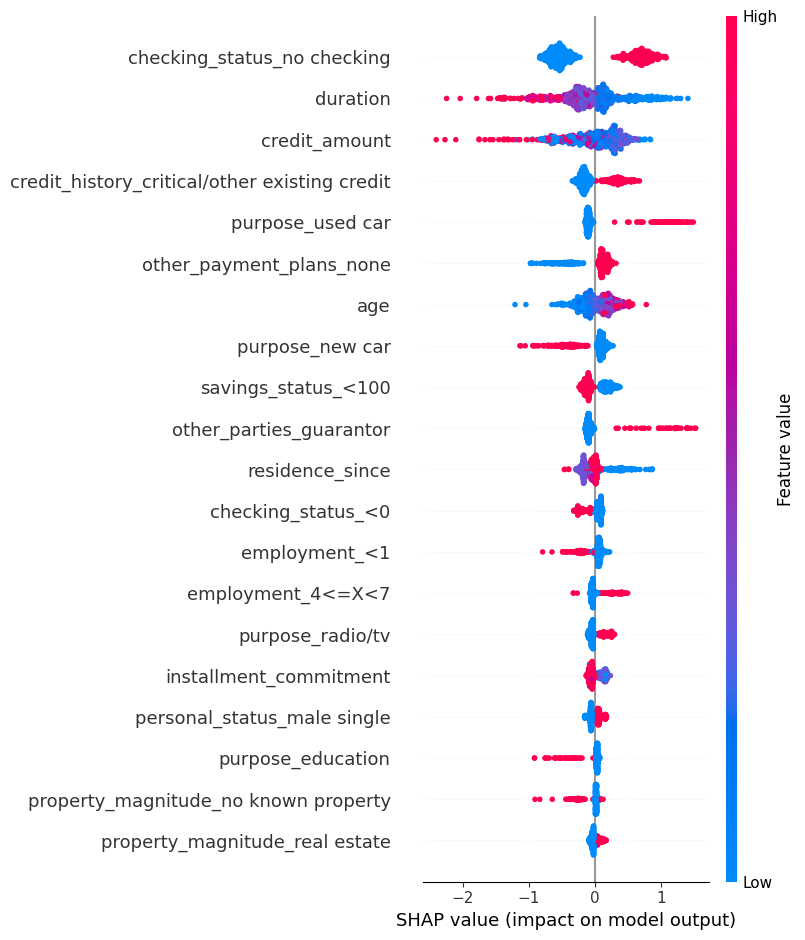

In [21]:
modelo, X_train, y_train = explicabilidade_shap(credit_customers_data, target='class')

---

**Variáveis mais influentes**
1. **`checking_status_no checking`** → Ausência de conta corrente indica maior risco.  
2. **`duration`** → Empréstimos mais longos aumentam a probabilidade de inadimplência.  
3. **`credit_amount`** → Valores mais altos do crédito estão associados a maior risco financeiro.  
4. **`credit_history_critical`** → Histórico de crédito ruim é um forte indicador de inadimplência.  
5. **`purpose_used car` / `purpose_new car`** → Finalidade do crédito influencia o risco, sendo veículos mais arriscados.  
6. **`savings_status_<100`** → Baixa poupança sugere menor capacidade de lidar com imprevistos.  
7. **`age`** → Clientes mais jovens podem ter menos histórico financeiro.  
8. **`employment_<1`** → Pouco tempo de emprego indica menor estabilidade financeira.  
9. **`other_parties_guarantor`** → Fiadores reduzem o risco e melhoram a chance de aprovação.  

**Conclusão**
O modelo confirma fatores tradicionais de análise de crédito, como **histórico financeiro, estabilidade de renda e reservas financeiras**. Bancos podem usar essas informações para **ajustar políticas de risco, personalizar produtos financeiros e promover inclusão bancária**.  


---

## 7) Tomada de decisão

---

**Recomendações Estratégicas para Gestão do Risco de Crédito**

Com base nos resultados do modelo, sugerimos as seguintes estratégias para mitigar riscos e otimizar a concessão de crédito:

**1. Segmentação e Personalização de Ofertas**  
- Criar **perfis de risco** baseados nas principais variáveis influentes (ex: histórico de crédito, tempo de emprego, saldo em conta).  
- Ajustar **taxas de juros e limites de crédito** conforme o risco identificado.  
- Desenvolver **produtos personalizados** para perfis de maior risco, exigindo garantias ou coobrigação.

**2. Reforço na Análise de Crédito**  
- Implementar **modelos preditivos baseados em Machine Learning** para classificar clientes de forma mais precisa.  
- Priorizar variáveis como **tempo de emprego, saldo bancário e propósito do crédito** na avaliação de risco.  
- Exigir documentação adicional para clientes de alto risco antes da concessão do crédito.

**3. Política de Garantias e Mitigação de Riscos**  
- Incentivar o uso de **fiadores e garantias reais** para clientes com menor estabilidade financeira.  
- Ajustar prazos de pagamento para **reduzir o risco de inadimplência** em empréstimos de longo prazo.  
- Criar programas de **educação financeira** para clientes de alto risco.

**4. Monitoramento Contínuo e Gestão Proativa**  
- Implementar **monitoramento contínuo do comportamento financeiro** dos clientes após a concessão do crédito.  
- Criar alertas para **sinais de risco iminente** (ex: queda no saldo bancário, atraso recorrente).  
- Desenvolver políticas de **renegociação proativa** para clientes com risco crescente, reduzindo o impacto de inadimplência.

**Conclusão**  
O uso de modelos preditivos e análise de risco baseada em dados permite uma **concessão de crédito mais segura e eficiente**. A adoção dessas estratégias pode **reduzir inadimplência, aumentar a rentabilidade e melhorar a inclusão financeira** de clientes com diferentes perfis.  


---